In [123]:
import webbrowser as wb
wb.open("https://www.scaler.com/academy/mentee-dashboard/class/122247/project/problems/19753?navref=cl_tt_crd_sl")
path=!cd
import os
os.startfile(path[0]+'\\Other')

### Business and Problem Understanding

Problem Statement
- Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech
leaders and subject matter experts.
- The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to
the latest technologies. It is a product by InterviewBit.
- You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to
work for from the Scaler database.
- You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company,
and other features. Ideally, these clusters should have similar characteristics.

Data Dictionary:
- 'Unnamed 0'- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

Concept Used:
- Manual Clustering
- Unsupervised Clustering - K- means, Hierarchical Clustering


Problem Statement and Data Analysis Approch

We are given with the information for a segment of learners and are asked to cluster them on the basis of their job profile, company and other features. The created clusters should have similar characteristics.
The shape of the dataset looks like we have around 2 lakh rows with 7 columns. There are few null values and categorical values present in the data.
By describing the data, we get to know information about statistics of the data.
From the data, it can be referred that there are few outliers present to the data that should be removed.
As there are few null value rows in the dataset, hence need to fill the missing values.
        2. Hypothesis Testing
There are few duplicate values present in the dataset after performing different steps, that are removed.
There are some missing values present in the dataset and hence used the KNN Imputer to fill the missing values.
For cleaning the company names, I have used regular expression to make them more proper.
Data Encoding was done to different features.

        3.  Manual Clustering
Created Designation Flags. ( Designation: Salary an employee is getting wrt salary in the same Company, Job_Position & Years of Experience )
Created Class Flags. ( Class: Salary an employee is getting wrt the salary in the same Company & Job_Position )
Created Tier Flags. (  Tier: Salary an employee is getting wrt the salary in the same Company )
       4. Unsupervised learning
Checked for the cluster tendency using Hopkins score and Silhouette score.
Hopkins Score - A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.
Created K-means clustering by finding the required number of clusters using Elbow method.
Created Hierarchial Clustering by finding appropriate clusters through dendograms and built a agglomerative clustering based model.

      5. Insights and Recommendations
           Below example points can be answered from the built model. 
Macro Analysis
1. Top 10 employees (earning more than most of the employees in the company) (tier 1) 
Top 10 employees of data science in Amazon / TCS etc earning more than their peers (class 1).
Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers (class 3) 
Bottom 10 employees (earning less than most of the employees in the company) (tier 3) 
Top 10 employees in the amazon- data science- having 5/6/7 years of experience earning more than their peers 
Micro Analysis
Top 10 companies (basis on their offered CTC) - grouped_c, sort by descending, head(10) 
Top 2 positions in every company (basis on their offered CTC) - grouped_c_j, sort by descending, head(10)

Drive Link for code - https://drive.google.com/file/d/1KnC5Rkr3s3FjTPRMskEcJMPYfWRsLmIj/view?usp=sharing


### Exploratory Data Analysis

In [108]:
import pandas as pd
df = pd.read_csv('Data_Scaler.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [374]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [109]:
df.drop(columns=['Unnamed: 0', 'email_hash'], inplace=True)

In [110]:
df.rename(columns={'orgyear':'org_join_year'}, inplace=True)

In [111]:
df['ctc']=(df['ctc']/10**5).round(2)

In [112]:
df['job_position'] = df['job_position'].str.lower()

In [113]:
df_cleaned = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   org_join_year     205757 non-null  float64
 2   ctc               205843 non-null  int64  
 3   job_position      153281 non-null  object 
 4   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.9+ MB


In [129]:
(df.isna().mean() * 100).round(2)

company_hash         0.02
org_join_year        0.04
ctc                  0.00
job_position        25.53
ctc_updated_year     0.00
dtype: float64

In [7]:
df.nunique()

company_hash        37299
org_join_year          77
ctc                  3360
job_position         1017
ctc_updated_year        7
dtype: int64

In [8]:
df.describe()

,org_join_year,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [9]:
df.describe(include='object')

,company_hash,job_position
count,205799,153281
unique,37299,1017
top,nvnv wgzohrnvzwj otqcxwto,Backend Engineer
freq,8337,43554


In [44]:
df[df['org_join_year']>2025]['org_join_year'].value_counts()

2026.0     9
2031.0     5
2029.0     5
2028.0     4
20165.0    2
2106.0     1
2101.0     1
2107.0     1
2027.0     1
2204.0     1
Name: org_join_year, dtype: int64

In [45]:
df[df['org_join_year']<1970]['org_join_year'].value_counts()

0.0       17
3.0        6
91.0       3
2.0        3
5.0        2
1.0        2
6.0        2
208.0      1
209.0      1
206.0      1
4.0        1
83.0       1
38.0       1
1900.0     1
201.0      1
200.0      1
Name: org_join_year, dtype: int64

In [46]:
df = df[df['org_join_year'].between(1997, 2025)]

In [13]:
df['ctc'].min(), df['ctc'].max()

(2, 1000150000)

In [14]:
df["ctc"].quantile(0.01)

37000.0

In [15]:
df["ctc"].quantile(0.99)

12500000.0

In [51]:
df[df['ctc']<df["ctc"].quantile(0.01)]['ctc'].value_counts()

10000    156
20000    120
30000     94
12000     64
15000     57
        ... 
28200      1
4700       1
6400       1
15100      1
33740      1
Name: ctc, Length: 244, dtype: int64

In [16]:
df[df['ctc']>df["ctc"].quantile(0.99)]['ctc'].value_counts()

100000000    528
200000000    374
20000000      55
50000000      47
15000000      31
            ... 
31300000       1
43500000       1
80800000       1
58900000       1
67300000       1
Name: ctc, Length: 408, dtype: int64

In [17]:
Q1 = df["ctc"].quantile(0.25)
Q3 = df["ctc"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(Q1,Q3,IQR,lower,upper)

530000.0 1700000.0 1170000.0 -1225000.0 3455000.0


### String Columns Processing

In [52]:
import re
def preprocess_string(string):
 new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
 return new_string

mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [53]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["company_hash"].nunique()

36982

In [63]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

856

In [ ]:
# removing the records where company or job_position reocords are not available 

In [66]:
len(df[((df["company_hash"] == "") | (df["job_position"] == ""))])

96

In [70]:
len(df[((df["company_hash"] == "nan") | (df["job_position"] == "nan"))])

52425

In [71]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == "") | (df["company_hash"] == "nan") | (df["job_position"] == "nan"))]
df

,company_hash,org_join_year,ctc,job_position,ctc_updated_year,ctc_clipped,ctc_binned,ctc_log
0,atrgxnnt xzaxv,2016.0,11.00000,other,2020.0,11.00000,"(10.0, 12.5]",2.484907
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,4.49999,fullstack engineer,2019.0,4.49999,"(2.5, 5.0]",1.704746
2,ojzwnvwnxw vx,2015.0,20.00000,backend engineer,2020.0,20.00000,"(17.5, 20.0]",3.044522
3,ngpgutaxv,2017.0,7.00000,backend engineer,2019.0,7.00000,"(5.0, 7.5]",2.079442
4,qxen sqghu,2017.0,14.00000,fullstack engineer,2019.0,14.00000,"(12.5, 15.0]",2.708050
...,...,...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,2016.0,15.00000,fullstack engineer,2021.0,15.00000,"(12.5, 15.0]",2.772589
205326,xzegojo,2019.0,12.00000,fullstack engineer,2021.0,12.00000,"(10.0, 12.5]",2.564949
205327,wgbuzgcv wgznqvwn,2015.0,10.00000,data scientist,2021.0,10.00000,"(7.5, 10.0]",2.397895
205328,ahzzyhbmj,2019.0,11.00000,data scientist,2021.0,11.00000,"(10.0, 12.5]",2.484907


### Feature Engineering

In [ ]:
# Masked company name to "Others" having count less than 5

In [84]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [85]:
(df["company_hash"] == "Others").sum()

40449

In [89]:
df['company_hash'].value_counts()

Others                       40449
nvnv wgzohrnvzwj otqcxwto     5301
xzegojo                       3442
vbvkgz                        2575
wgszxkvzn                     2095
                             ...  
zg                               5
vqqgf trtwnqgzxwo                5
bgmxogen xzegntwy                5
lbq xzegntwy                     5
qxkkrt                           5
Name: company_hash, Length: 3035, dtype: int64

In [120]:
df["experience_in_org"] = 2025 - df["org_join_year"]

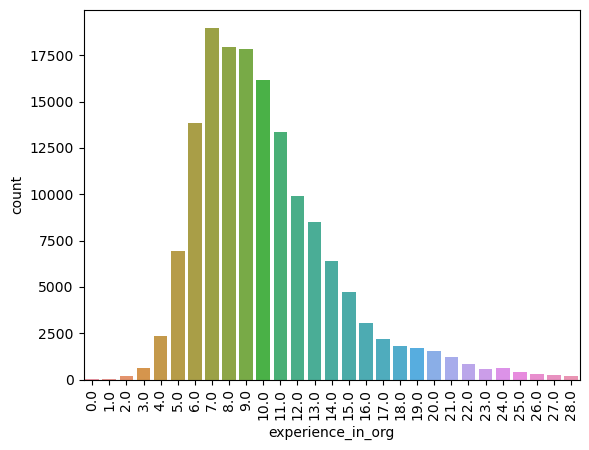

In [121]:
sns.countplot(x='experience_in_org', data=df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Manual Clustering based on Company , Job position and Years of experience

### Outliers Treatment

In [9]:
df = df_cleaned.copy()

income = [40000, 120000]
age = [21, 21]

income = 120000 may not be an outlier univariately, but for a 21-year-old, it could be suspicious.

IQR/Z-Score can’t detect this — but LOF or IsolationForest can, because they consider relationships between features.



Use visual + rule-based + ML hybrid approach

Visualize year with boxplot or value counts.

Combine rule-based filtering for obviously invalid entries (like year 20225) before ML-based outlier detection.

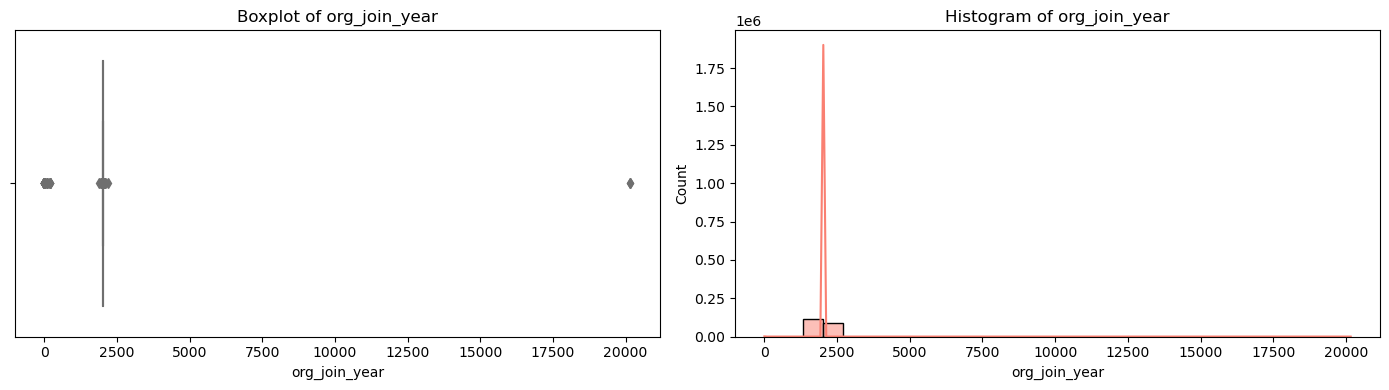

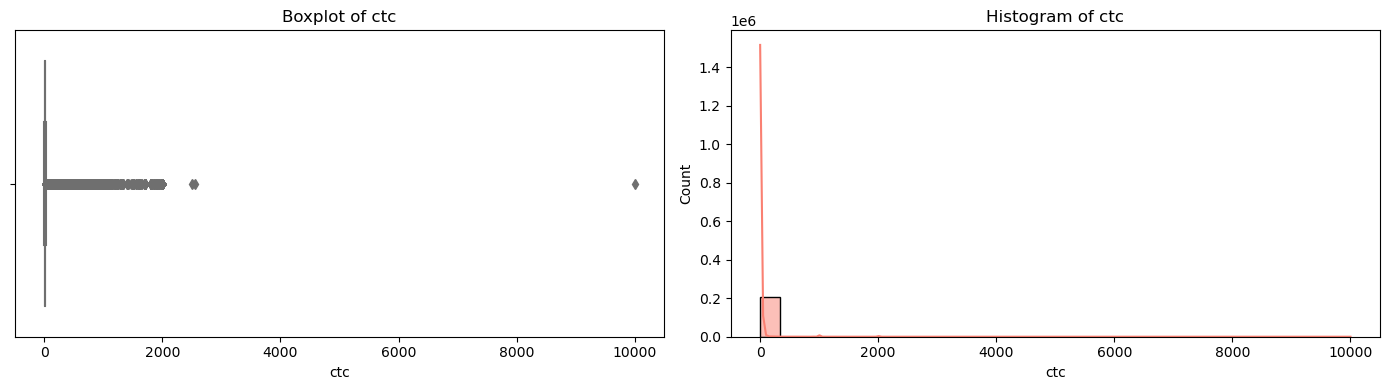

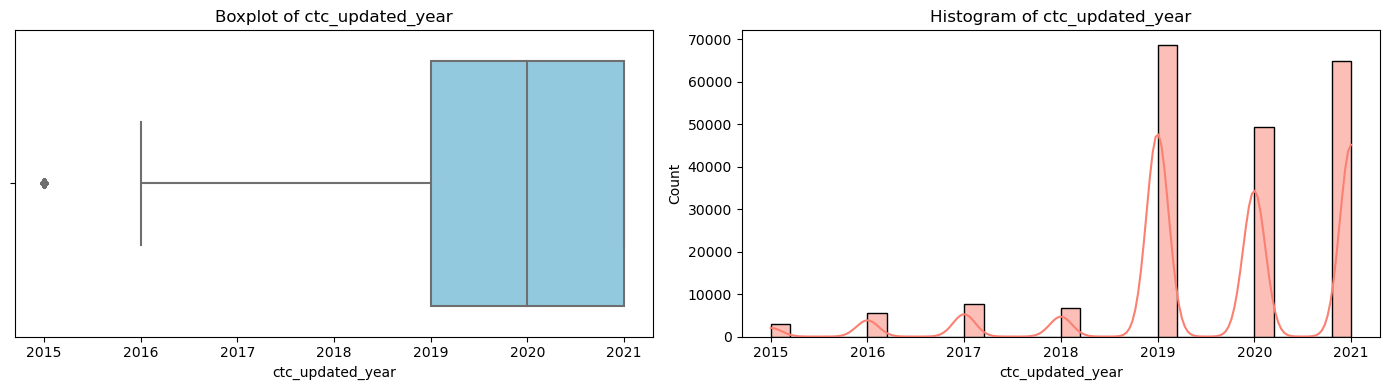

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')

    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

In [312]:
df.describe().round(2)

,org_join_year,ctc,ctc_updated_year
count,205757.00,205843.00,205843.00
mean,2014.88,22.72,2019.63
std,63.57,118.01,1.33
min,0.00,0.00,2015.00
25%,2013.00,5.30,2019.00
50%,2016.00,9.50,2020.00
75%,2018.00,17.00,2021.00
max,20165.00,10001.50,2021.00


0.05


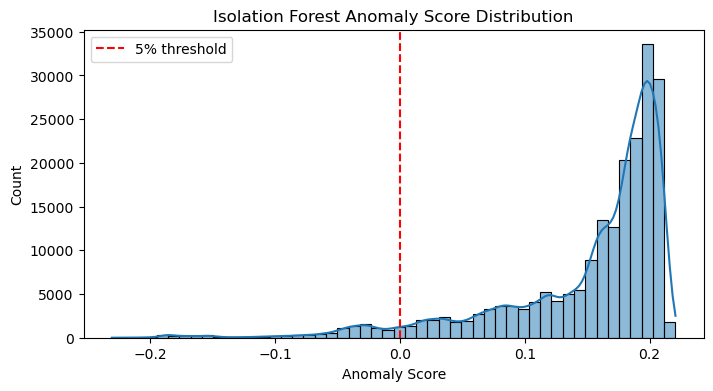

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer, SimpleImputer

numerical_cols = df.select_dtypes(include='number').columns

# IsolationForest Method
model = IsolationForest(contamination=0.05)
preds = model.fit_predict(df[numerical_cols])
df_iso_cleaned = df[preds == 1]  # -1 = outlier, 1 = inlier
print(round(len(df[preds == -1]) / len(df), 2))

# # LocalOutlierFactor Method
# df_temp = df.copy()  # Temporary imputation (for LOF to work)
# df_temp[numerical_cols] = pd.DataFrame(
#     SimpleImputer(strategy='median').fit_transform(df[numerical_cols]),
#     columns=numerical_cols)
# model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# preds = model.fit_predict(df_temp[numerical_cols])  # -1 is outlier
# df_lof_cleaned = df.loc[preds == 1].reset_index(drop=True)


## Get anomaly scores
scores = model.decision_function(df[numerical_cols])  # higher = more normal
# preds = model.predict(df[numerical_cols])  # -1 = outlier, 1 = inlier
## Can manually choose a threshold
# threshold = np.percentile(scores, 5)  # bottom 5% = outliers
# preds_manual = (scores < threshold).astype(int)  # 1 = outlier, 0 = inlier
## Can attach results to original data
# df['iso_pred'] = iso_preds
# df['anomaly_score'] = anomaly_scores
## Can check stats to find differences
# outliers = df[iso_preds == -1]
# inliers = df[iso_preds != -1]
# outliers.describe() - inliers.describe()
# Can isualize anomaly score distribution
plt.figure(figsize=(8, 4))
sns.histplot(scores, bins=50, kde=True)
plt.axvline(np.percentile(scores, 5), color='red', linestyle='--', label='5% threshold')
plt.title('Isolation Forest Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.legend()
plt.show()

df = df_iso_cleaned.copy()

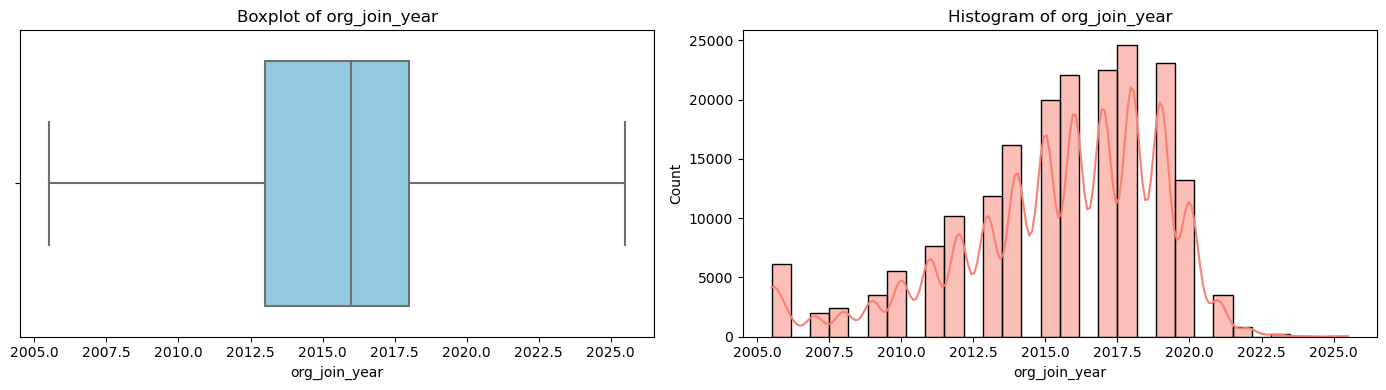

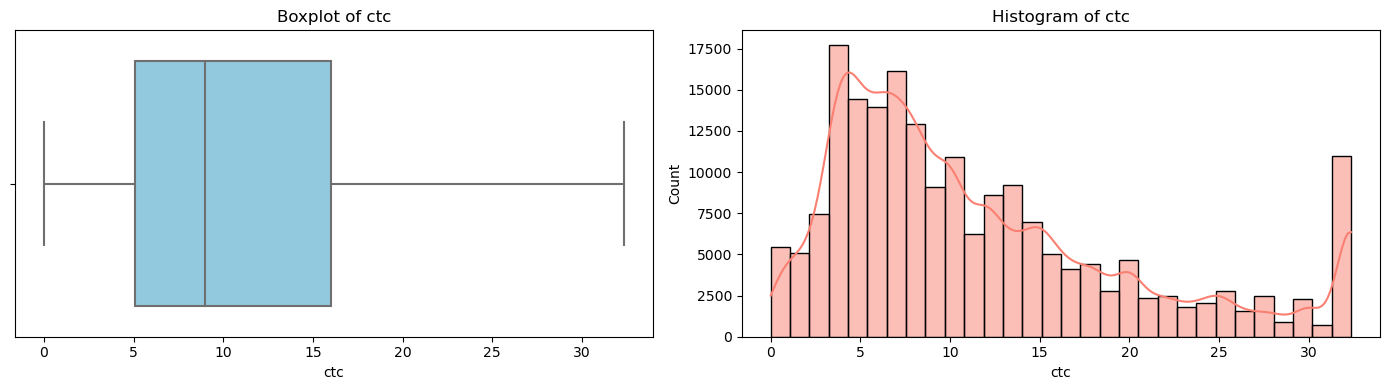

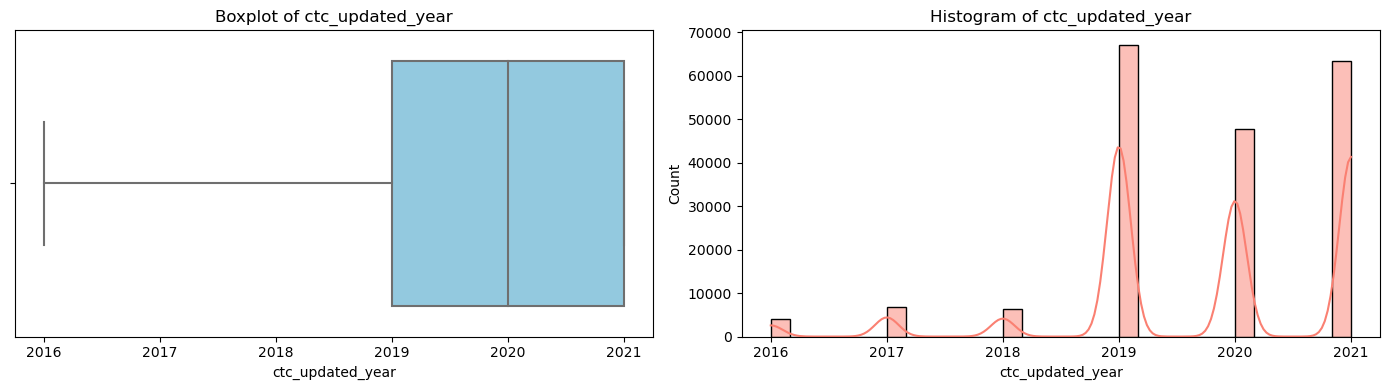

In [115]:
# Anomaly, Extreme or global outliers capping (numeric cols only)

# IQR-Based Capping
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                  np.where(df[column] > upper, upper, df[column]))
    return df

# Z-score capping
# from scipy.stats import zscore
# def cap_outliers_zscore(df, column, threshold=3):
#     z = zscore(df[column])
#     mean = df[column].mean()
#     std = df[column].std()
#     upper = mean + threshold * std
#     lower = mean - threshold * std
#     df[column] = np.where(df[column] > upper, upper,
#                   np.where(df[column] < lower, lower, df[column]))
#     return df

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = cap_outliers_iqr(df, col)  # or cap_outliers_zscore

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

In [127]:
# Check and Drop High-Cardinality Categorical Columns

def drop_high_cardinality_columns(df, threshold=100):
    high_card_cols = [
        col for col in df.select_dtypes(include='object').columns
        if df[col].nunique() > threshold] 
    print(f"Dropping {len(high_card_cols)} high-cardinality columns: {high_card_cols}")
    # df = df.drop(columns=high_card_cols)
    return df
    
# df = drop_high_cardinality_columns(df, threshold=100)
drop_high_cardinality_columns(df, threshold=100)

In [136]:
# Capping Rare Categories as Other (only ~10% of total rows)

def cap_bottom_5_percent(series):
    # Exclude NaNs for frequency calculation
    value_counts = series.dropna().value_counts(normalize=True).sort_values()
    cumulative = value_counts.cumsum()
    # Find rare categories (cumulative freq ≤ 10%)
    rare_categories = cumulative[cumulative <= 0.1].index
    print(list(rare_categories))
    # Replace rare ones with 'Rare_<column>', keep NaNs untouched
    col_name = series.name
    # rare_label = f'Rare_{col_name}'
    rare_label = 'Other'
    return series.apply(lambda x: rare_label if x in rare_categories else x)
for col in df.select_dtypes(include='object').columns:
    df[col] = cap_bottom_5_percent(df[col])

## If have Small Cardinality Frequency Encoding 
## best for tree based, not for distance based like linear, knn, kmeans
## better than onehot encoding when many categories on memory concerns
for col in df.select_dtypes(include='object').columns:
    df['freq'] = df[col].map(df[col].value_counts())

##  If have High-Cardinality Categorical Columns
## Keep top N frequent categories +  one-hot encode only top N
# top_n = df['cat_col'].value_counts().nlargest(20).index
# df['cat_col'] = df['cat_col'].apply(lambda x: x if x in top_n else 'Other')

['wxowg ojntbo', 'qtznoytq gzrxzt qtznvro ucn rna', 'bqq ogen xzw', 'sg vxqrxzto', 'np20 xzaxv ucn rna', 'vzq', 'oqxvlz', 'gagg xzaxv nxzj tqu ucn rbn', 'xmtbxv', 'bsm', 'xib wgqugqvnxgz', 'btnvfxzs sqghu ge ntwyzgrgsxto', 'owgnxv mvzp', 'vuuqg ojontbo ucn rna', 'atuxdta xn ogrhnxgz', 'vnrvo wguwg xzaxv uqxcvnt rxbxnta', 'nyxzpxnxct ntwyzgrgsj ucn rna', 'bvznyvz ogenfvqt ojontbo ucn rna', 'wvrxmogen ntwyzgrgsxto', 'pvqxsgq', 'exqonmvzp ge zxstqxv', 'pggpx', 'xzzgcxnx uvjbtzn ogrhnxgz ucn rna', 'xzwvtzag ucn rna', 'orxatoxsbv xzaxv', 'bmm rvmo ucn rna', 'xbuxzst ogrhnxgzo', 't9 ogrhnxgzo ucn rna', 'mjwjoyvqt ntwyzgrgsj ucn rna', 'oytrr xzaxv bvqptn u rna', 'wxnxsqghu srgmvr otqcxwto', 'tdntzata ftmvuu ntwy ucn rna', 'ztg ojuytq ojontbo ucn rna', 'cxqsxz btaxv', 'bxzantwy ogrhnxgzo ucn rna', 'wjmtqrxzpo ntwyzgrgsxto', 'ucp wgqu', 'uhzwyy ntwy ucn rna', 'vob tzntquqxot ogrhnxgzo rna vz vrntzwvrogenrvmo wgbuvzj', 'bvqrvmo xzw agzt fxny xn', 'urtdxntwy ntwyzgrgsxto ucn rna', 'avnv xzntzoxnj

### Missing values Handeling

In [144]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns
# Impute Numerical Columns ---
num_imputer = SimpleImputer(strategy='median')  # median is robust to outliers
df[num_cols] = num_imputer.fit_transform(df[num_cols])
# Impute Categorical Columns
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

## If all columns are numerical or encoded and have similarity in rows
# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

## If all columns are numerical or encoded and have correlation among features 
# iter_imputer = IterativeImputer(random_state=42, max_iter=10)
# df_imputed = iter_imputer.fit_transform(df)

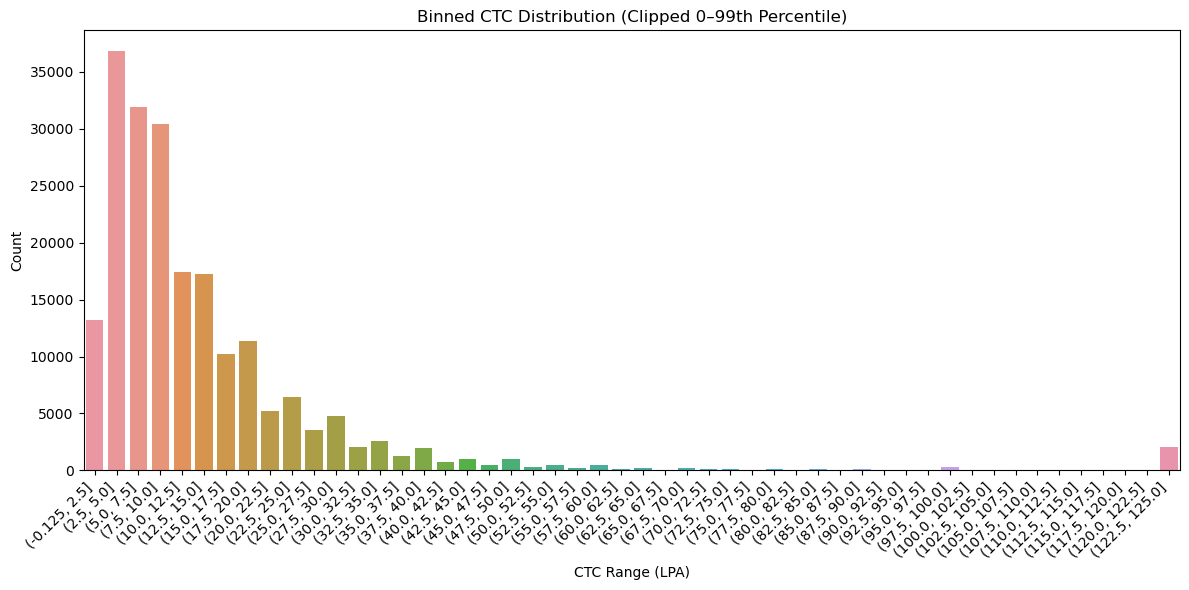

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If df is a slice, reset to avoid SettingWithCopyWarning
df = df.copy()

# Scale CTC
df.loc[:, 'ctc'] = df['ctc'] / 10**5

# Clip CTC between 0 and 99th percentile
lower = df['ctc'].quantile(0.00)
upper = df['ctc'].quantile(0.99)

# bring outliers to lower and upper value
df.loc[:, 'ctc_clipped'] = df['ctc'].clip(lower, upper)  
# Create 50 bins
df['ctc_binned'] = pd.cut(df['ctc_clipped'], bins=50)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='ctc_binned', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Binned CTC Distribution (Clipped 0–99th Percentile)')
plt.xlabel('CTC Range (LPA)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


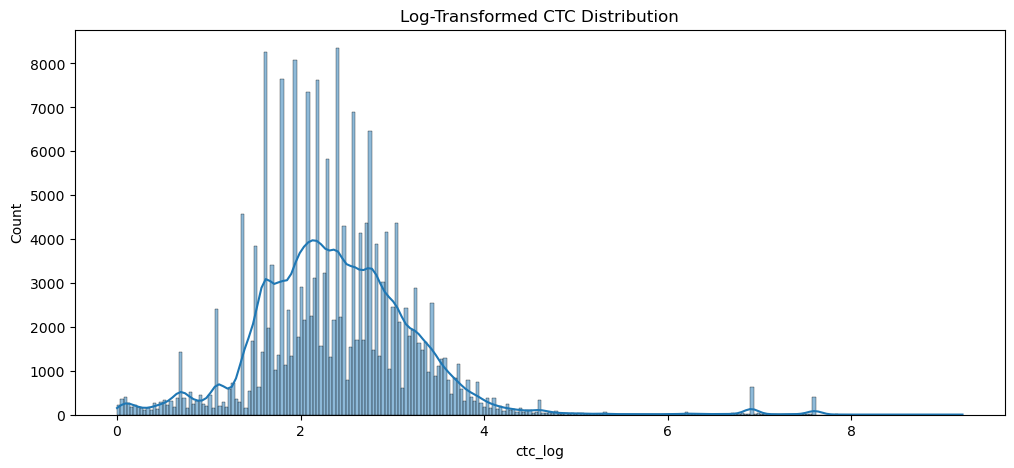

In [50]:
df['ctc_log'] = np.log1p(df['ctc'])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(df['ctc_log'], kde=True)
plt.title('Log-Transformed CTC Distribution')
plt.show()

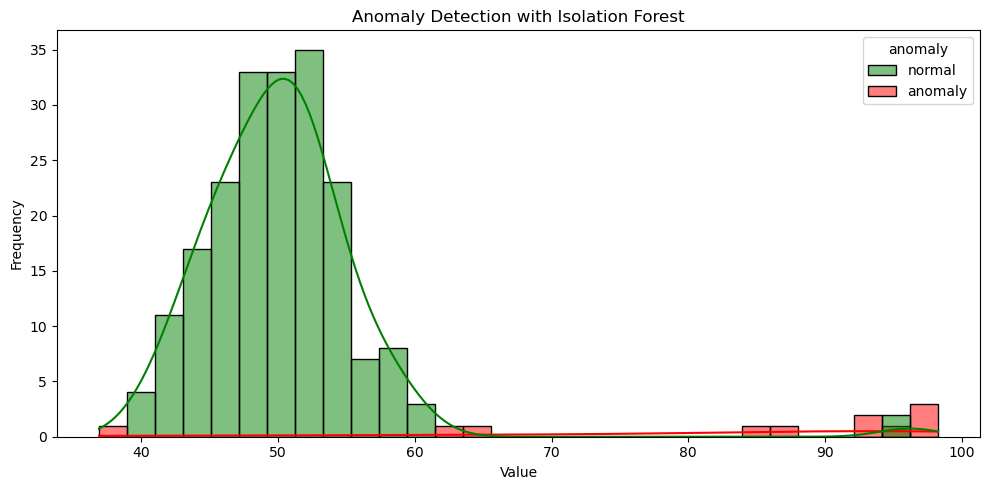

In [72]:
# 🌲 Isolation Forest
# Machine learning-based anomaly detection technique.
# Works by isolating observations in a tree structure.
# Multivariate: can detect outliers in high-dimensional feature space.
# Doesn’t assume normal distribution.

# ✅ Good when:
# You have complex or high-dimensional data.
# Anomalies are not just high/low values but strange combinations.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Create synthetic data
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=5, size=200)  # Normal data
anomalies = np.random.uniform(low=80, high=100, size=10)    # Anomalies
data = np.concatenate([normal_data, anomalies])

# Convert to DataFrame
df1 = pd.DataFrame(data, columns=['value'])

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df1['anomaly'] = iso_forest.fit_predict(df1[['value']])  # -1: anomaly, 1: normal
df1['anomaly'] = df1['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Visualize
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x='value', hue='anomaly', bins=30, kde=True, palette={'normal': 'green', 'anomaly': 'red'})
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

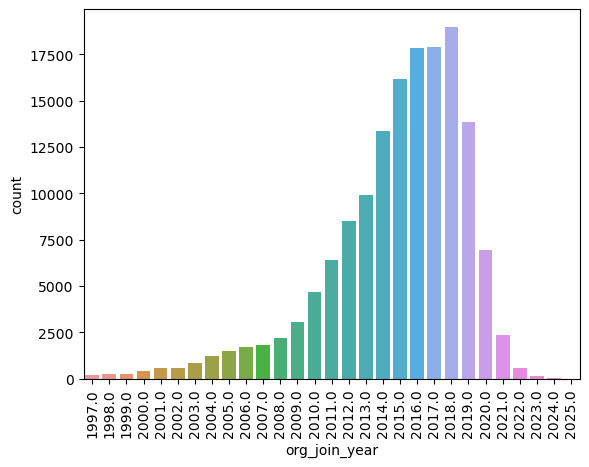

In [81]:
sns.countplot(x='org_join_year', data=df)
plt.xticks(rotation = 90)
plt.show()

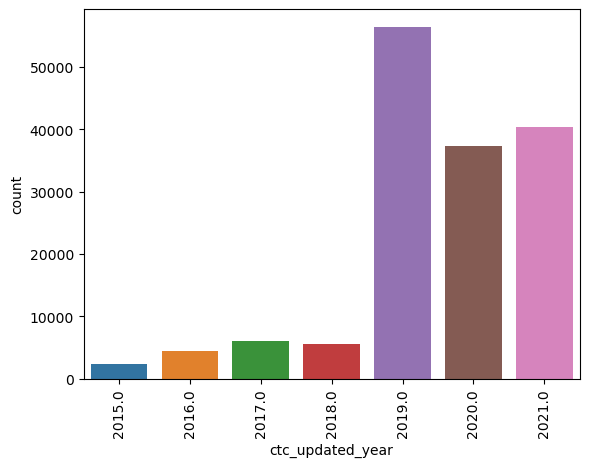

In [82]:
sns.countplot(x='ctc_updated_year', data=df)
plt.xticks(rotation = 90)
plt.show()

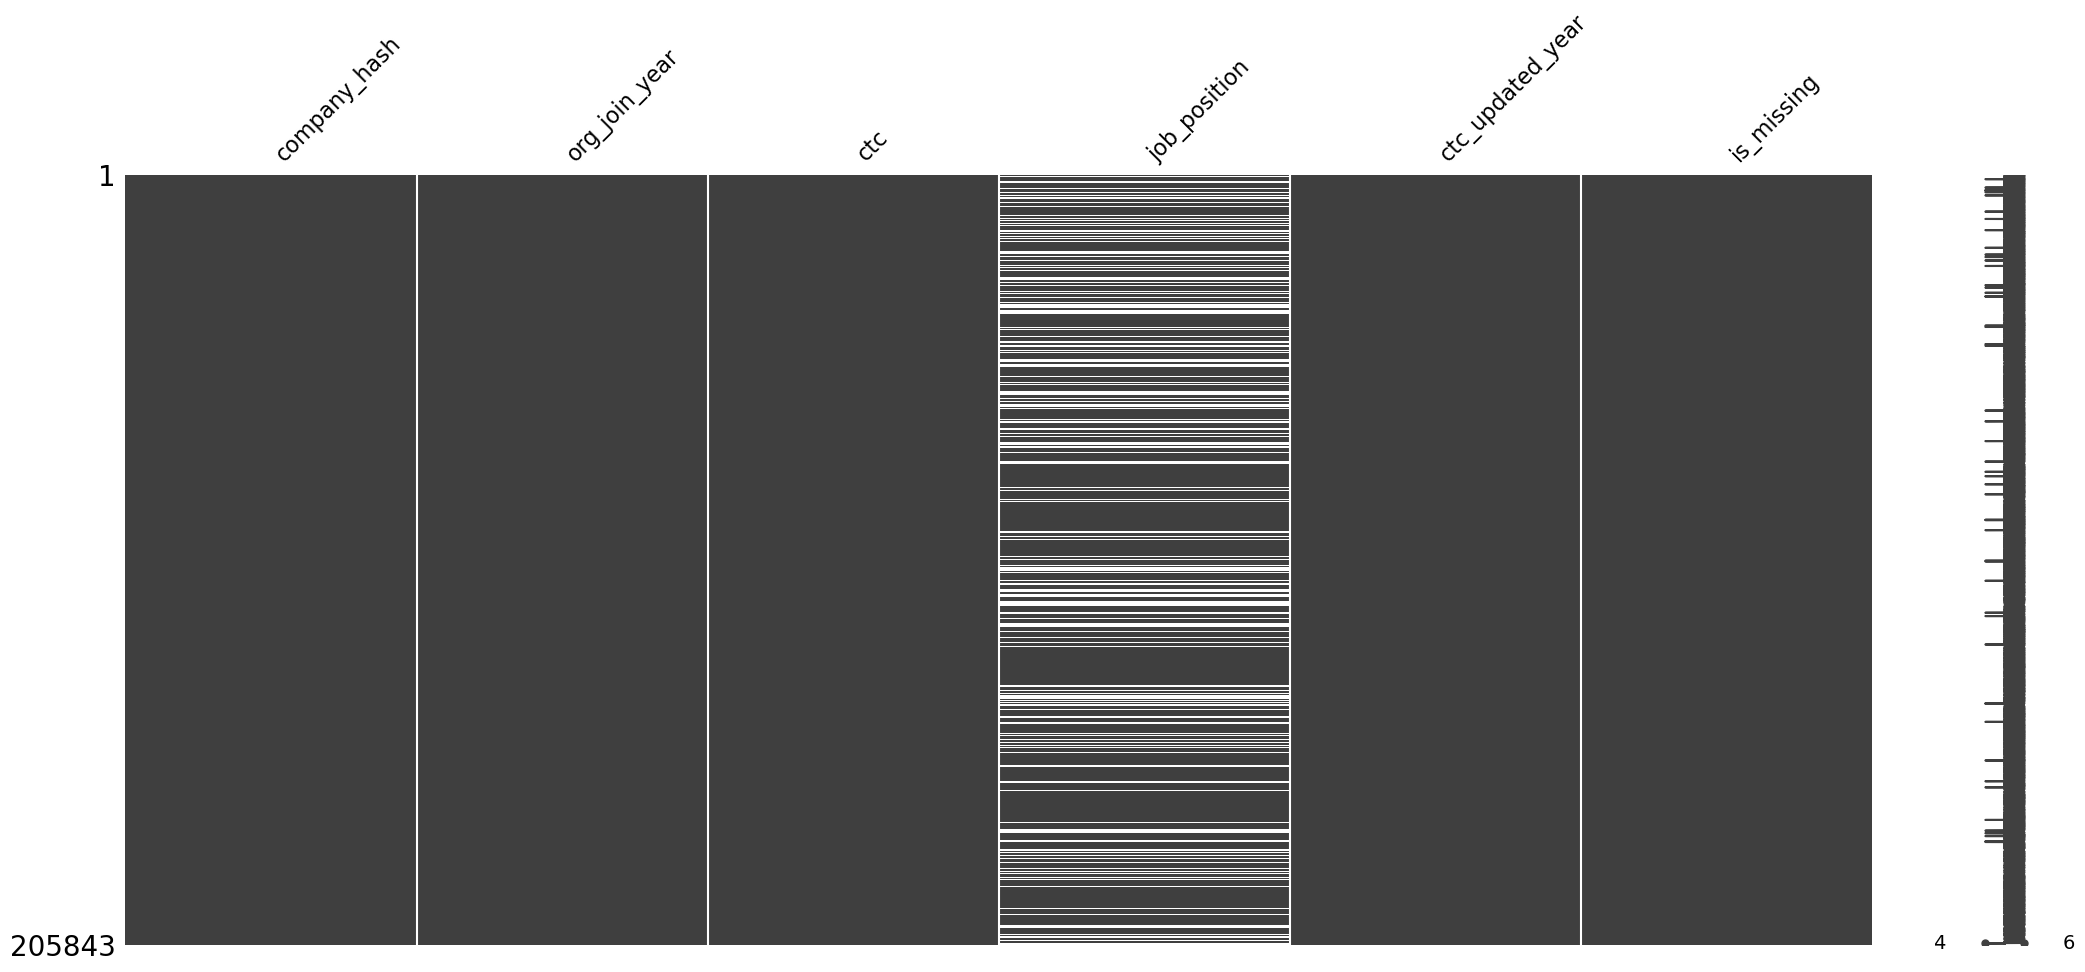

In [154]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

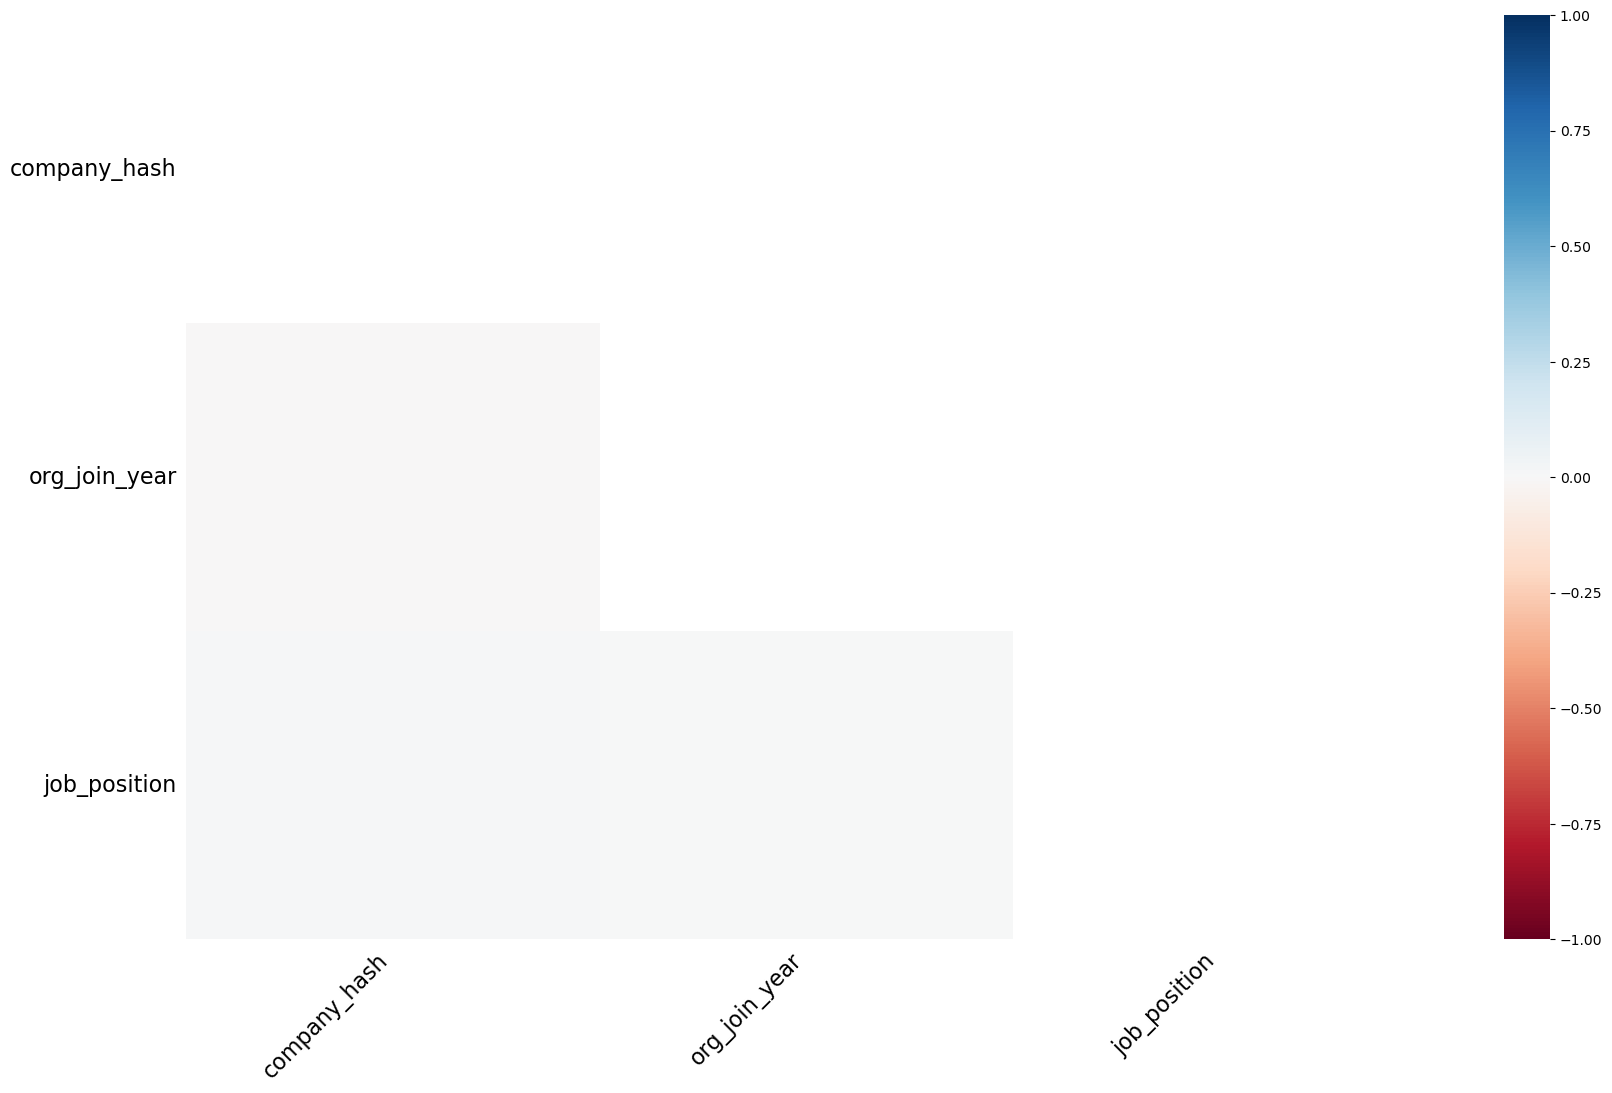

In [155]:
msno.heatmap(df)
plt.show()

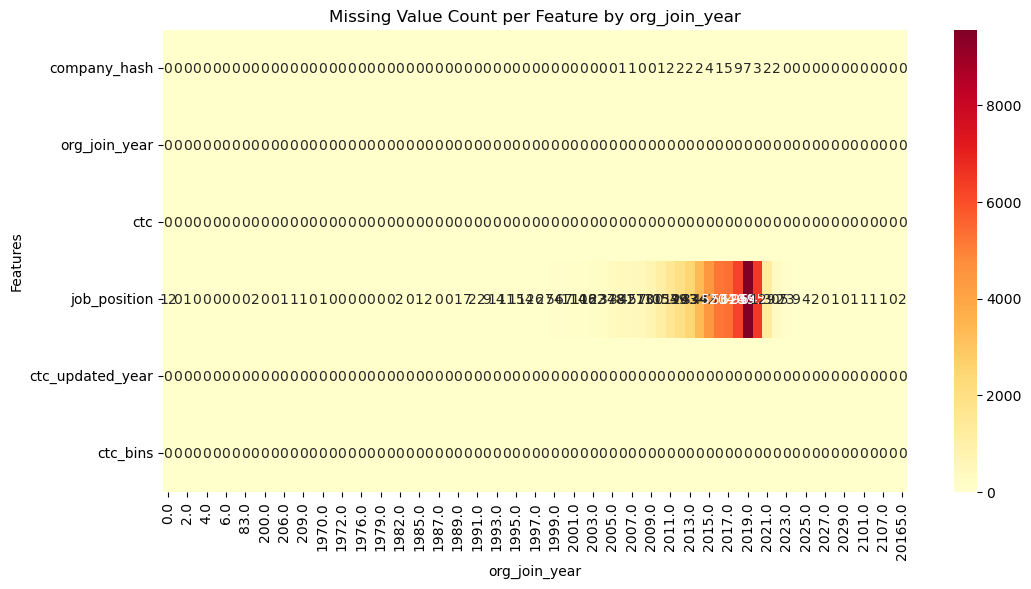

In [226]:
# Create a dataframe of missing values grouped by a category
group_col = 'org_join_year'  # or any categorical column
missing_by_cat = df.groupby(group_col).apply(lambda x: x.isnull().sum()).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_cat, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(f"Missing Value Count per Feature by {group_col}")
plt.ylabel("Features")
plt.xlabel(group_col)
plt.show()


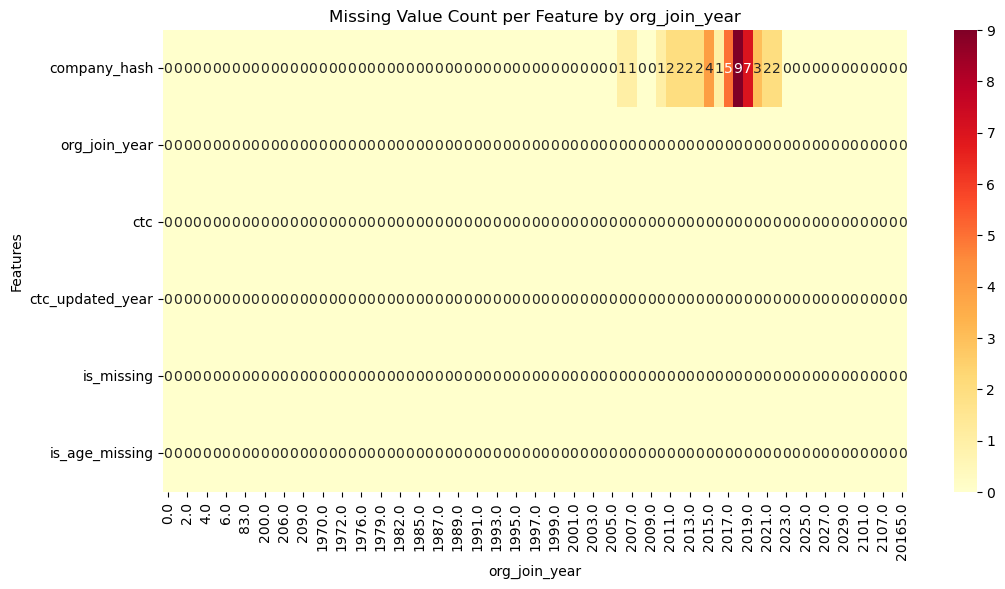

In [167]:
# Create a dataframe of missing values grouped by a category
group_col = 'org_join_year'  # or any categorical column
missing_by_cat = df.drop(['job_position'], axis=1).groupby(group_col).apply(lambda x: x.isnull().sum()).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_cat, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(f"Missing Value Count per Feature by {group_col}")
plt.ylabel("Features")
plt.xlabel(group_col)
plt.show()


In [187]:
df.groupby('ctc_updated_year')[df.columns].count()

,company_hash,org_join_year,ctc,job_position,ctc_updated_year
ctc_updated_year,,,,,
2015.0,2927,2926,2927,2400,2927
2016.0,5498,5501,5501,4467,5501
2017.0,7559,7556,7561,6137,7561
2018.0,6742,6735,6746,5650,6746
2019.0,68676,68666,68688,56819,68688
2020.0,49436,49405,49444,37375,49444
2021.0,64961,64968,64976,40433,64976


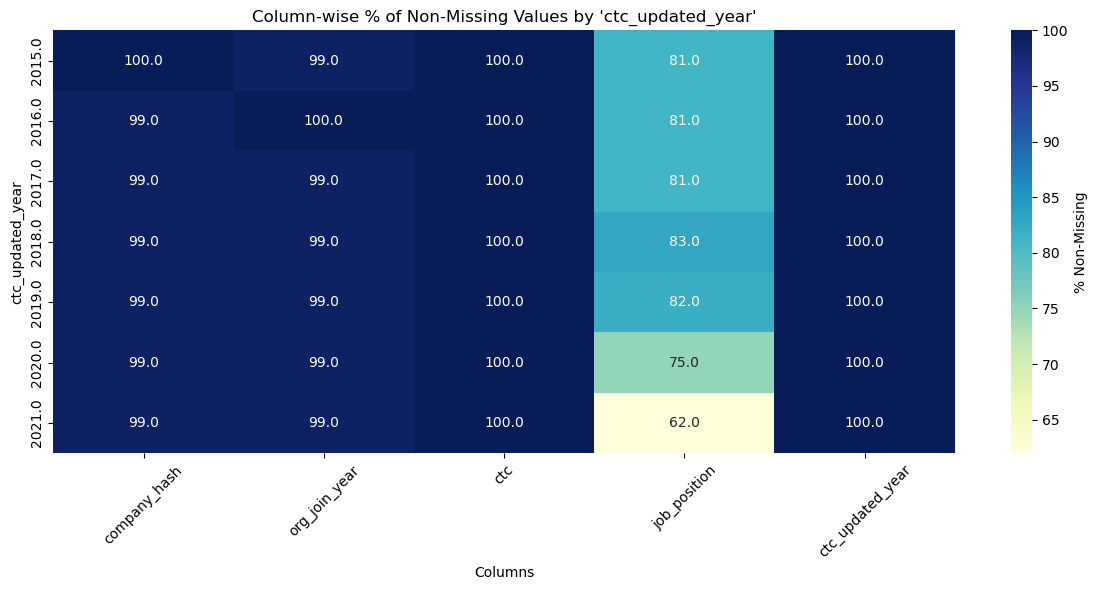

In [209]:
# Visualizing Missing Value Over Categories

group_size = df.groupby('ctc_updated_year').size().to_frame('group_total')
non_null_counts = df.groupby('ctc_updated_year')[df.columns].count()
non_null_pct = non_null_counts.div(group_size['group_total'], axis=0) * 100
non_null_pct = non_null_pct.astype(int)
non_null_pct

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(non_null_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% Non-Missing'})
plt.title("Column-wise % of Non-Missing Values by 'ctc_updated_year'")
plt.ylabel("ctc_updated_year")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

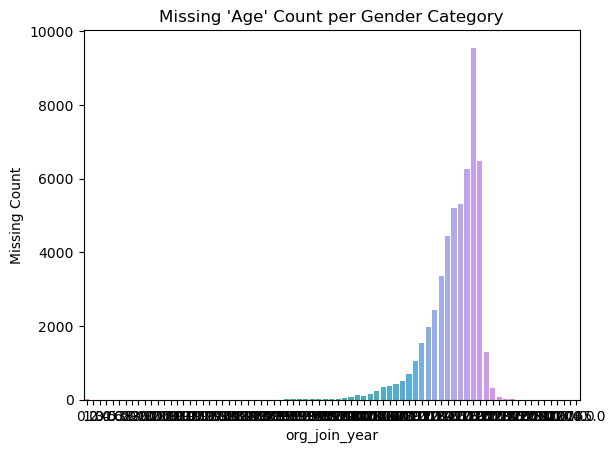

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Count of missing 'Age' for each 'Gender' category
df['is_age_missing'] = df['job_position'].isnull()

missing_by_gender = df.groupby('org_join_year')['is_age_missing'].sum().reset_index()

# Plot
sns.barplot(data=missing_by_gender, x='org_join_year', y='is_age_missing')
plt.title("Missing 'Age' Count per Gender Category")
plt.ylabel("Missing Count")
plt.show()


### Binning Discretization

In [187]:
from sklearn.preprocessing import KBinsDiscretizer

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
binned_data = pd.DataFrame(index=df.index)

for col in numeric_cols:
    unique_vals = df[col].nunique()
    bins = min(10, unique_vals)
    binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    binned_col = binner.fit_transform(df[[col]])
    df[f"{col}_bin"] = binned_col.astype(int)

### Encoding Categories

In [194]:
# Separate all categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
bin_cols = [col for col in df.columns if col.endswith('_bin')]

# Frequency encode high-cardinality object columns
high_card_cols = [col for col in cat_cols if df[col].nunique() > 10]
for col in high_card_cols:
    freq_map = df[col].value_counts(normalize=True)
    df[f"{col}_freq"] = df[col].map(freq_map)

# One-hot encode:
# - binned features
# - low-cardinality object columns
low_card_cols = [col for col in cat_cols if col not in high_card_cols]
ohe_cols = low_card_cols + bin_cols
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

# Drop original high-card columns (after encoding)
df.drop(columns=high_card_cols, inplace=True)


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195550 entries, 0 to 205842
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   org_join_year           195550 non-null  float64
 1   ctc                     195550 non-null  float64
 2   ctc_updated_year        195550 non-null  float64
 3   freq                    195550 non-null  float64
 4   company_hash_freq       195550 non-null  float64
 5   job_position_freq       195550 non-null  float64
 6   org_join_year_bin_1     195550 non-null  uint8  
 7   org_join_year_bin_2     195550 non-null  uint8  
 8   org_join_year_bin_3     195550 non-null  uint8  
 9   org_join_year_bin_4     195550 non-null  uint8  
 10  org_join_year_bin_5     195550 non-null  uint8  
 11  org_join_year_bin_6     195550 non-null  uint8  
 12  org_join_year_bin_7     195550 non-null  uint8  
 13  org_join_year_bin_8     195550 non-null  uint8  
 14  org_join_year_bin_9 

### Scaling Features

In [200]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.copy()

# Initialize the scaler
scaler = StandardScaler()
scaler_X.fit(X)
X_scaled = scaler_X.transform(X)
# Convert back to DataFrame
df = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)

In [206]:
df.describe().round(2)

,org_join_year,ctc,ctc_updated_year,freq,company_hash_freq,job_position_freq,org_join_year_bin_1,org_join_year_bin_2,org_join_year_bin_3,org_join_year_bin_4,...,ctc_updated_year_bin_1,ctc_updated_year_bin_2,ctc_updated_year_bin_3,ctc_updated_year_bin_4,ctc_updated_year_bin_5,freq_bin_1,freq_bin_3,freq_bin_4,freq_bin_5,freq_bin_9
count,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,...,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00,195550.00
mean,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.78,-1.38,-3.20,-1.50,-0.52,-1.51,-0.18,-0.27,-0.36,-0.48,...,-0.19,-0.18,-0.72,-0.57,-0.69,-0.23,-0.31,-0.75,-0.38,-0.52
25%,-0.68,-0.78,-0.63,-0.43,-0.52,-0.77,-0.18,-0.27,-0.36,-0.48,...,-0.19,-0.18,-0.72,-0.57,-0.69,-0.23,-0.31,-0.75,-0.38,-0.52
50%,0.15,-0.32,0.23,-0.18,-0.49,-0.28,-0.18,-0.27,-0.36,-0.48,...,-0.19,-0.18,-0.72,-0.57,-0.69,-0.23,-0.31,-0.75,-0.38,-0.52
75%,0.71,0.51,1.09,0.27,-0.21,1.23,-0.18,-0.27,-0.36,-0.48,...,-0.19,-0.18,1.38,-0.57,1.44,-0.23,-0.31,1.33,-0.38,-0.52
max,2.81,2.45,1.09,1.66,2.34,1.23,5.64,3.72,2.81,2.10,...,5.29,5.46,1.38,1.76,1.44,4.28,3.25,1.33,2.60,1.93


### Train Model

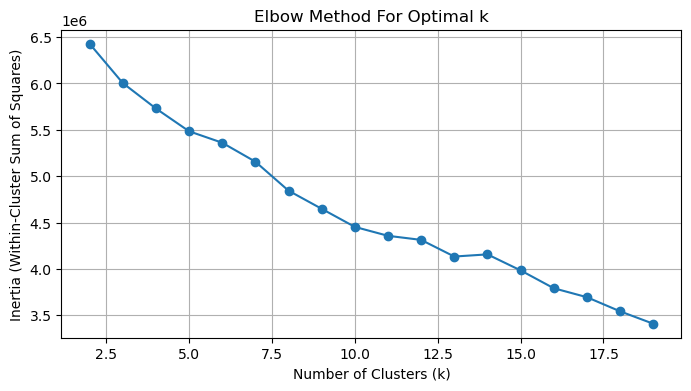

In [209]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 20)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()